In [58]:
import numpy as np
print(np.__version__)

1.15.4


In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter


from skimage import color
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (4084, 4084, 3)


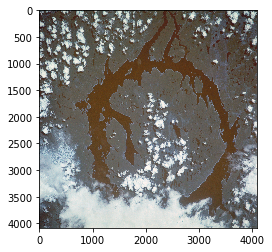

In [60]:
image = cv2.imread('data/Test/Boreal_June.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

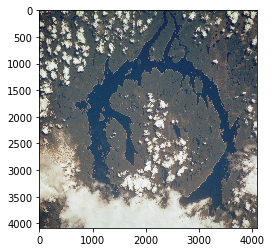

In [61]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

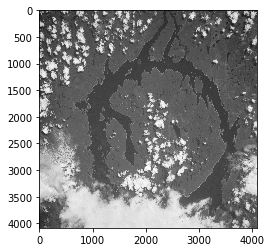

In [62]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

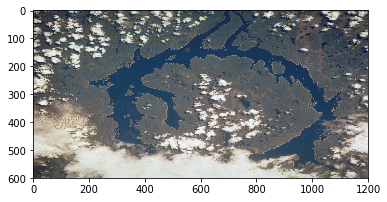

In [63]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [64]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [107]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (1200, 1200))
    plt.imshow(resized_image)
    return image

In [108]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

In [109]:
path1='data/Test/Boreal_June.jpg'
path2='data/Test/Deciduous_Nov.jpg'
path3='data/Test/DV_Sep.jpg'
path4='data/Test/Rainforest_Nov.jpg'
path5='data/Test/TropGrass_Dec.jpg'
path6='data/Test/Tundra_July.jpg'
path7='data/Test/USGrass_July.jpg'
# colors=get_colors(get_image('data/Test/Boreal_June.jpg'), 3, True)
# colors[0]

array([108.56358277,  95.67064892,  81.99374441])

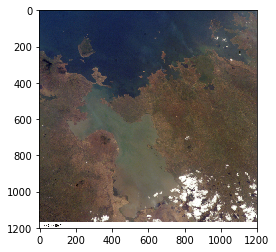

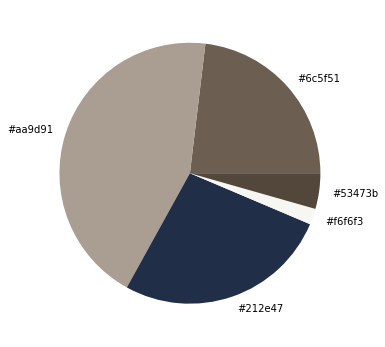

In [122]:
#https://www.color-blindness.com/color-name-hue/
colors=get_colors(get_image(path5), 5, True)
colors[0]

In [111]:
import webcolors

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

# requested_colour = (119, 172, 152)
actual_name, closest_name = get_colour_name(colors[0])

print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

Actual colour name: None , closest colour name: gainsboro


In [112]:
colors[0]

array([218.73873103, 221.43561379, 214.61307586])

In [113]:
def get_colour_name(rgb_triplet):
    min_colours = {}
    for key, name in webcolors.css21_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb_triplet[0]) ** 2
        gd = (g_c - rgb_triplet[1]) ** 2
        bd = (b_c - rgb_triplet[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

actual_name= get_colour_name(colors[0])
print("Actual colour name:", actual_name)

Actual colour name: silver
